# Basic Data Processing

In [248]:
import numpy as npy  
import pandas as pds 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dataFrame_1 = pds.read_csv('Dataset_1.csv')  

grouped_sIPs = dataFrame_1.groupby('sourceIP').count()
grouped_dIPs = dataFrame_1.groupby('destIP').count()
grouped_clfs = dataFrame_1.groupby('classification').count()

In [249]:
distict_sIPs_count = grouped_sIPs.shape[0]
distict_dIPs_count = grouped_dIPs.shape[0]
distict_clfs_count = grouped_clfs.shape[0]

print("Distict Source IP addresses are: " + str(distict_sIPs_count))
print("Distict Destination IP addresses are: " + str(distict_dIPs_count))
print("Distict Classifications are: " + str(distict_clfs_count))

Distict Source IP addresses are: 98
Distict Destination IP addresses are: 261
Distict Classifications are: 3


# Basic Data Analysis and Visualisation

       SourceIPs  Frequency  IndexColumn
0     10.32.5.51        319            0
1     10.32.5.52        299            1
2     10.32.5.53        966            2
3     10.32.5.54       1008            3
4     10.32.5.55        959            4
..           ...        ...          ...
93  172.23.5.115        146           93
94  172.23.5.117        148           94
95  172.23.5.120        146           95
96  172.23.5.121        146           96
97  172.23.5.124        146           97

[98 rows x 3 columns]
    DestinationIPs  Frequency  IndexColumn
0      172.23.0.10      13505            0
1     172.23.0.108         74            1
2     172.23.0.109          2            2
3     172.23.0.110          1            3
4     172.23.1.168         63            4
..             ...        ...          ...
256  172.23.240.36          1          256
257  172.23.240.37          1          257
258  172.23.240.38          2          258
259  172.23.252.10         31          259
260  172.23.

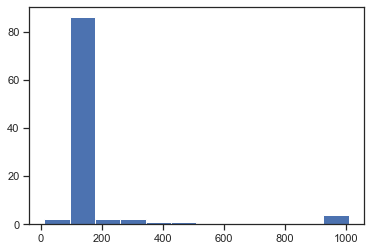

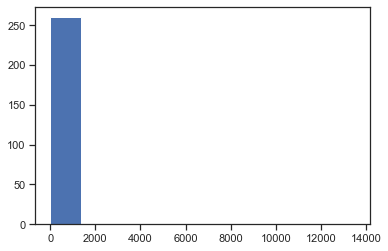

In [250]:
sIP_dict = dataFrame_1.groupby('sourceIP').groups
dIP_dict = dataFrame_1.groupby('destIP').groups

distict_sIPs_keys = list(sIP_dict.keys()) # Distinct Source IPs list
distict_dIPs_keys = list(dIP_dict.keys()) # Distinct Destination IPs list


distict_sIPs_values = list(map(lambda x: x.size, sIP_dict.values()))  # Distinct Source IPs Frequency of appearance
distict_dIPs_values = list(map(lambda x: x.size, dIP_dict.values()))  # Distinct Destination IPs Frequency of appearance

sIPs_df = pd.DataFrame(list(zip(distict_sIPs_keys, distict_sIPs_values)), 
               columns =['SourceIPs', 'Frequency']) 

dIPs_df = pd.DataFrame(list(zip(distict_dIPs_keys, distict_dIPs_values)), 
             columns =['DestinationIPs', 'Frequency']) 

sIPs_df['IndexColumn'] = sIPs_df.index
dIPs_df['IndexColumn'] = dIPs_df.index

# Dataframe with distinct Source IPs and their Frequency of appearance
print(sIPs_df)

# Dataframe with distinct Destination IPs and their Frequency of appearance
print(dIPs_df)

plt.hist(sIPs_df['Frequency'], bins=12)  # Histogram plot of 12 bins
plt.show()

plt.hist(dIPs_df['Frequency'], bins=10)
plt.show()


# Clustering

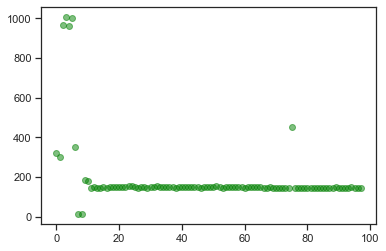

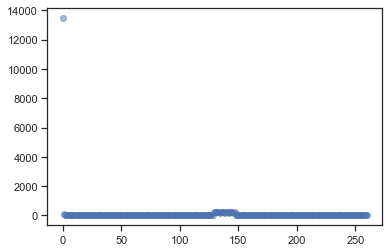

In [251]:
# Data distribution Scatter Plots of Destination and Source IPs
color_source = ("green")
color_destin = ("red")

plt.scatter(sIPs_df['IndexColumn'], sIPs_df['Frequency'], c=color_source, alpha=0.5)
plt.show()

plt.scatter(dIPs_df['IndexColumn'], dIPs_df['Frequency'], alpha=0.5)
plt.show()

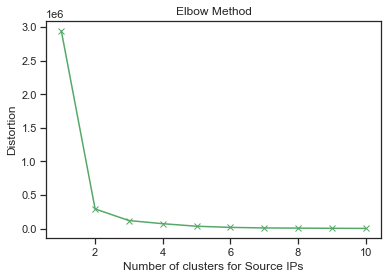

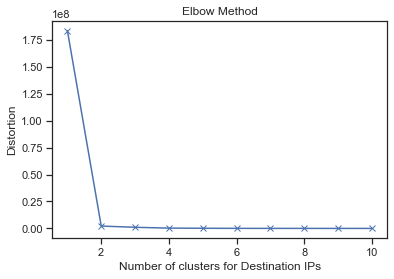

In [252]:
# K-means: Finding the optimal number of clusters with Elbow Plot

wcss_s = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sIPs_df[['IndexColumn', 'Frequency']])
    wcss_s.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_s, 'gx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters for Source IPs')
plt.ylabel('Distortion')
plt.show()

wcss_d = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(dIPs_df[['IndexColumn', 'Frequency']])
    wcss_d.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_d, 'x-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters for Destination IPs')
plt.ylabel('Distortion')
plt.show()

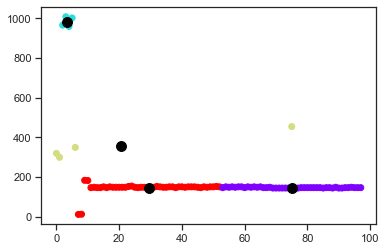

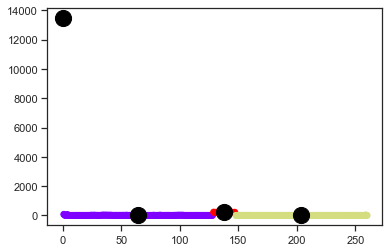

In [253]:
# K-means clustering with 4 clusters for both Source and Destination IPs

kmeans = KMeans(n_clusters=4, init='k-means++')
pred_y = kmeans.fit_predict(sIPs_df[['IndexColumn', 'Frequency']])
plt.scatter(sIPs_df['IndexColumn'], sIPs_df['Frequency'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=sIPs_df.shape[0], c='black')
plt.show()


kmeans = KMeans(n_clusters=4, init='k-means++')
pred_y = kmeans.fit_predict(dIPs_df[['IndexColumn', 'Frequency']])
plt.scatter(dIPs_df['IndexColumn'], dIPs_df['Frequency'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=dIPs_df.shape[0], c='black')
plt.show()



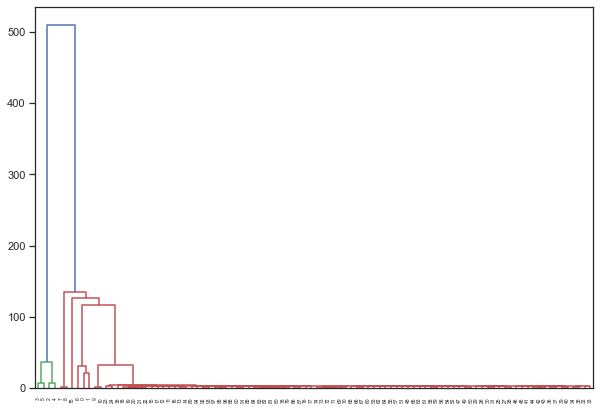

[[ 51.74444444 145.26666667]
 [  3.5        983.75      ]
 [ 20.5        355.25      ]]
[[[6.91723581e+02 7.36125926e+01]
  [7.36125926e+01 4.38417779e+02]]

 [[1.25000100e+00 7.37500000e+00]
  [7.37500000e+00 4.62187501e+02]]

 [[9.95250001e+02 1.82812500e+03]
  [1.82812500e+03 3.56718750e+03]]]
[0.91836735 0.04081633 0.04081633]


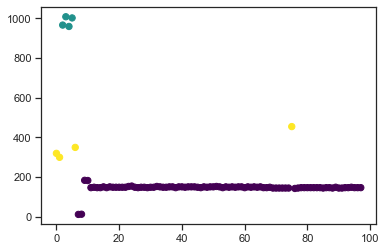

In [254]:

# Hierarchial Clustering of Source IPs
from scipy.cluster.hierarchy import dendrogram, linkage
x= np.array(sIPs_df[['IndexColumn', 'Frequency']])
linked = linkage(x, 'single')
labelList = range(0, len(x))
plt.figure(figsize=(10, 7)) 
dendrogram(linked,labels=labelList) 
plt.show()

# Gaussian Mixture Clustering of Source IPs
'''Gaussian Mixture Clustering of SourceIPs'''
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(x)
print(gmm.means_)
print(gmm.covariances_)
print(gmm.weights_)
labels = gmm.predict(x) 
plt.scatter(x[:, 0], x[:, 1], c=labels, s=40, cmap='viridis')



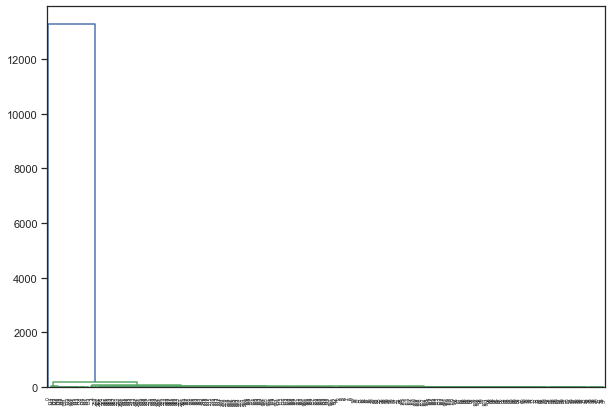

[[8.68030450e+01 7.80896815e+01]
 [0.00000000e+00 1.35050000e+04]
 [1.43156438e+02 1.81079216e+00]]
[[[ 2.47142430e+03  3.14871927e+03]
  [ 3.14871927e+03  8.30181306e+03]]

 [[ 1.00000000e-06  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e-06]]

 [[ 5.83581173e+03 -1.50969072e+01]
  [-1.50969072e+01  1.25015235e+00]]]
[0.22373002 0.00383142 0.77243856]


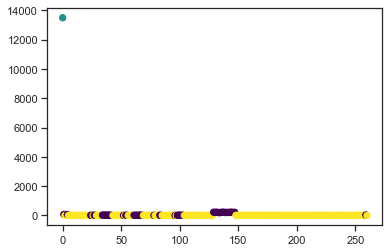

In [255]:
'''Hierarchial Clustering of Destination IPs'''
from scipy.cluster.hierarchy import dendrogram, linkage
y= np.array(dIPs_df[['IndexColumn', 'Frequency']])
linked = linkage(y, 'single')
labelList = range(0, len(y))
plt.figure(figsize=(10, 7)) 
dendrogram(linked,labels=labelList) 
plt.show()

'''Gaussian Mixture Clustering of Destination'''
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3).fit(y)
print(gmm.means_)
print(gmm.covariances_)
print(gmm.weights_)
labels = gmm.predict(y) 
plt.scatter(y[:, 0], y[:, 1], c=labels, s=40, cmap='viridis')

# Relationships

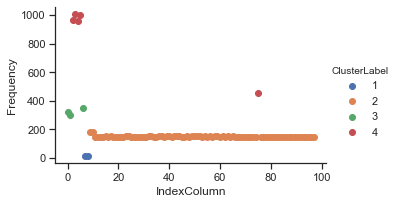

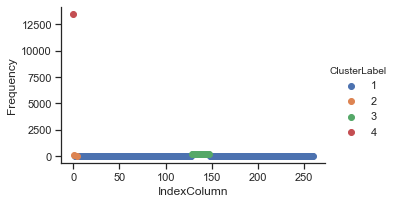

In [256]:
import seaborn
seaborn.set(style='ticks')

def clusterSourceIPs (row):
    if row['Frequency'] <21:
        cluster = 1
    elif row['Frequency'] >20 and row['Frequency'] <201:
        cluster = 2
    elif row['Frequency'] >200 and row['Frequency'] <401:
        cluster = 3
    else:
        cluster = 4
    return cluster

def clusterDestinationIPs (row):
    if row['Frequency'] <41:
        cluster = 1
    elif row['Frequency'] >40 and row['Frequency'] <101:
        cluster = 2
    elif row['Frequency'] >100 and row['Frequency'] <401:
        cluster = 3
    else:
        cluster = 4
    return cluster

sIPs_df['ClusterLabel'] = sIPs_df.apply(clusterSourceIPs, axis=1)  #  CReate a new column with cluster labels for SourceIPs
dIPs_df['ClusterLabel'] = dIPs_df.apply(clusterDestinationIPs, axis=1) #  CReate a new column with cluster labels for DestinationIPs


#  Plot the clusters now.....
cluster_range= [1,2,3,4]
sp = seaborn.FacetGrid(data=sIPs_df[['IndexColumn','Frequency','ClusterLabel']], hue='ClusterLabel', hue_order=cluster_range, aspect=1.61)
sp.map(plt.scatter, 'IndexColumn', 'Frequency').add_legend()
plt.show()

dp = seaborn.FacetGrid(data=dIPs_df[['IndexColumn','Frequency','ClusterLabel']], hue='ClusterLabel', hue_order=cluster_range, aspect=1.61)
dp.map(plt.scatter, 'IndexColumn', 'Frequency').add_legend()
plt.show()





In [258]:


def createLabelForSource(row):
    ip = row['sourceIP']
    indexVal = sIPs_df[sIPs_df.SourceIPs == ip].index.item();
    '''print(indexVal)'''
    '''print(ip.head())'''
    '''print(sIPs_df.at[indexVal,'ClusterLabel'])'''
    return sIPs_df.at[indexVal,'ClusterLabel']

def createLabelForDestination(row):
    ip = row['destIP']
    indexVal = dIPs_df[dIPs_df.DestinationIPs == ip].index.item();
    '''print(indexVal)'''
    '''print(ip.head())'''
    '''print(sIPs_df.at[indexVal,'ClusterLabel'])'''
    return dIPs_df.at[indexVal,'ClusterLabel']

newDF = dataFrame_1[['sourceIP', 'destIP', 'classification']]
'''ddf = newDF[:3]'''

'''newDF.drop(['NewLabel'])'''
#  Create a dataframe of actual data merged with corresponding Source and Destination Labels for each IP
newDF['SourceLabel'] = newDF.apply(createLabelForSource, axis=1)   
newDF['DestinationLabel'] = newDF.apply(createLabelForDestination, axis=1)
print(newDF)



<ipython-input-258-6806422f6758>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF['SourceLabel'] = newDF.apply(createLabelForSource, axis=1)


         sourceIP          destIP  classification  SourceLabel  \
0      10.32.5.58  172.23.232.154   Misc activity            1   
1      10.32.5.56   172.23.232.56   Misc activity            4   
2      10.32.5.54    172.23.232.1   Misc activity            4   
3      10.32.5.57   172.23.233.52   Misc activity            3   
4      10.32.5.54   172.23.233.56   Misc activity            4   
...           ...             ...             ...          ...   
18425  10.32.5.51  172.23.134.216   Misc activity            3   
18426  10.32.5.55  172.23.134.215   Misc activity            4   
18427  10.32.5.53  172.23.134.219   Misc activity            4   
18428  10.32.5.56   172.23.134.78   Misc activity            4   
18429  10.32.5.54  172.23.128.118   Misc activity            4   

       DestinationLabel  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
18425                 3  

<ipython-input-258-6806422f6758>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF['DestinationLabel'] = newDF.apply(createLabelForDestination, axis=1)


In [259]:
'''Create new columns for Source clusters and destination clusters.'''

copiedDF = dataFrame_1.copy()

copiedDF['SourceLabel'] = copiedDF.apply(createLabelForSource, axis=1)
copiedDF['DestinationLabel'] = copiedDF.apply(createLabelForDestination, axis=1)
copiedDF['IndexColumn'] = copiedDF.index

print(copiedDF.head())


              time    sourceIP  sourcePort          destIP  destPort  \
0  4/14/2016 17:23  10.32.5.58        6667  172.23.232.154     23005   
1  4/14/2016 17:23  10.32.5.56        6667   172.23.232.56     23008   
2  4/14/2016 17:23  10.32.5.54        6667    172.23.232.1     23012   
3  4/14/2016 17:23  10.32.5.57        6667   172.23.233.52     23769   
4  4/14/2016 17:23  10.32.5.54        6667   172.23.233.56     23771   

   classification  priority  \
0   Misc activity         3   
1   Misc activity         3   
2   Misc activity         3   
3   Misc activity         3   
4   Misc activity         3   

                                               label  \
0   [1:2000355:5] ET POLICY IRC authorization mes...   
1   [1:2000355:5] ET POLICY IRC authorization mes...   
2   [1:2000355:5] ET POLICY IRC authorization mes...   
3   [1:2000355:5] ET POLICY IRC authorization mes...   
4   [1:2000355:5] ET POLICY IRC authorization mes...   

                                         pa

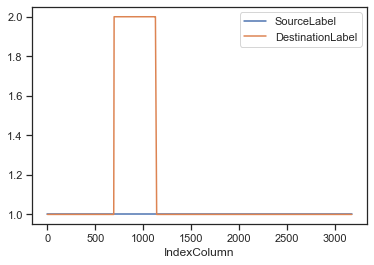

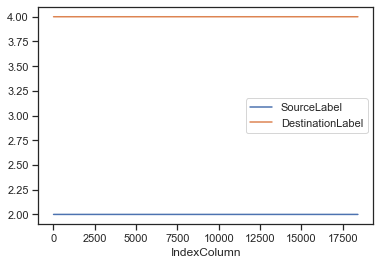

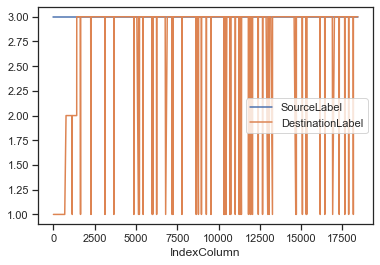

In [260]:
# Source and Destination Clusters Relationship...  


copiedDF[copiedDF['SourceLabel'] == 1].plot('IndexColumn',y=['SourceLabel','DestinationLabel'])
plt.show()

copiedDF[copiedDF['SourceLabel'] == 2].plot('IndexColumn',y=['SourceLabel','DestinationLabel'])
plt.show()

copiedDF[copiedDF['SourceLabel'] == 3].plot('IndexColumn',y=['SourceLabel','DestinationLabel'])
plt.show()

In [261]:
#  Conditional Probability Calculations
''''''
cond_prob = pd.DataFrame((copiedDF.groupby('SourceLabel')['DestinationLabel'].value_counts()/ copiedDF.groupby('SourceLabel')['DestinationLabel'].count()*100))    
print(cond_prob)  
  
    
                         

                              DestinationLabel
SourceLabel DestinationLabel                  
1           1                        60.869565
            2                        39.130435
2           4                       100.000000
3           3                        90.279214
            1                         6.721820
            2                         2.998966
4           3                        70.198223
            1                        17.202096
            4                        10.344042
            2                         2.255639


# Decision Trees Implementation


In [262]:
  

def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df

def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False
    
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):          
        values = data[:, column_index]
        unique_values = np.unique(values)
        
        potential_splits[column_index] = unique_values
    
    return potential_splits

def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]
    
    # feature is categorical   
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]
    
    return data_below, data_above

def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

def determine_type_of_feature(df):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):
    
    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df           
    
    
    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification
        
        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
            
        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)
        
        # instantiate sub-tree
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
       # if yes_answer == no_answer:
            #sub_tree = yes_answer
        #else:
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)
        
        return sub_tree
    
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":  # feature is continuous
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)
    
def calculate_accuracy(df, tree):

    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = df["classification"] == df["label"]
    
    accuracy = df["classification_correct"].mean()
    
    return accuracy

In [264]:
df = newDF.copy()
print (df)


         sourceIP          destIP  classification  SourceLabel  \
0      10.32.5.58  172.23.232.154   Misc activity            1   
1      10.32.5.56   172.23.232.56   Misc activity            4   
2      10.32.5.54    172.23.232.1   Misc activity            4   
3      10.32.5.57   172.23.233.52   Misc activity            3   
4      10.32.5.54   172.23.233.56   Misc activity            4   
...           ...             ...             ...          ...   
18425  10.32.5.51  172.23.134.216   Misc activity            3   
18426  10.32.5.55  172.23.134.215   Misc activity            4   
18427  10.32.5.53  172.23.134.219   Misc activity            4   
18428  10.32.5.56   172.23.134.78   Misc activity            4   
18429  10.32.5.54  172.23.128.118   Misc activity            4   

       DestinationLabel  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
18425                 3  

In [265]:
df = df[['sourceIP', 'destIP', 'SourceLabel', 'DestinationLabel', 'classification']]
print(df)

         sourceIP          destIP  SourceLabel  DestinationLabel  \
0      10.32.5.58  172.23.232.154            1                 1   
1      10.32.5.56   172.23.232.56            4                 1   
2      10.32.5.54    172.23.232.1            4                 1   
3      10.32.5.57   172.23.233.52            3                 1   
4      10.32.5.54   172.23.233.56            4                 1   
...           ...             ...          ...               ...   
18425  10.32.5.51  172.23.134.216            3                 3   
18426  10.32.5.55  172.23.134.215            4                 3   
18427  10.32.5.53  172.23.134.219            4                 3   
18428  10.32.5.56   172.23.134.78            4                 3   
18429  10.32.5.54  172.23.128.118            4                 1   

       classification  
0       Misc activity  
1       Misc activity  
2       Misc activity  
3       Misc activity  
4       Misc activity  
...               ...  
18425   Misc ac

In [266]:
df["label"] = df.classification
df = df.drop(["classification"], axis=1)
print(df.head())

     sourceIP          destIP  SourceLabel  DestinationLabel           label
0  10.32.5.58  172.23.232.154            1                 1   Misc activity
1  10.32.5.56   172.23.232.56            4                 1   Misc activity
2  10.32.5.54    172.23.232.1            4                 1   Misc activity
3  10.32.5.57   172.23.233.52            3                 1   Misc activity
4  10.32.5.54   172.23.233.56            4                 1   Misc activity


In [267]:
import random
from pprint import pprint

random.seed(0)

train_df, test_df = train_test_split(df, 0.2)
tree = decision_tree_algorithm(train_df, max_depth=3)
accuracy = calculate_accuracy(test_df, tree)

pprint(tree, width=50)
accuracy

{'DestinationLabel = 4': [{'SourceLabel = 4': [' '
                                               'Generic '
                                               'Protocol '
                                               'Command '
                                               'Decode',
                                               {'sourceIP = 172.23.0.111': [' '
                                                                            'Generic '
                                                                            'Protocol '
                                                                            'Command '
                                                                            'Decode',
                                                                            ' '
                                                                            'Generic '
                                                                            'Protocol '
                                  

0.9829083016820401

# Relation to Dataset_2


In [268]:
# Dataframe with second dataset.

dataFrame_2 = pds.read_csv('Dataset_2.csv')  

sIP_dict_2 = dataFrame_2.groupby('sourceIP').groups
dIP_dict_2 = dataFrame_2.groupby('destIP').groups

distict_sIPs_keys_2 = list(sIP_dict_2.keys()) # Distinct Source IPs list
distict_dIPs_keys_2 = list(dIP_dict_2.keys()) # Distinct Destination IPs list


distict_sIPs_values_2 = list(map(lambda x: x.size, sIP_dict_2.values()))  # Distinct Source IPs Frequency of appearance
distict_dIPs_values_2 = list(map(lambda x: x.size, dIP_dict_2.values()))  # Distinct Destination IPs Frequency of appearance

sIPs_df_2 = pd.DataFrame(list(zip(distict_sIPs_keys_2, distict_sIPs_values_2)), 
               columns =['SourceIPs', 'Frequency']) 

dIPs_df_2 = pd.DataFrame(list(zip(distict_dIPs_keys_2, distict_dIPs_values_2)), 
             columns =['DestinationIPs', 'Frequency']) 

sIPs_df_2['IndexColumn'] = sIPs_df_2.index
dIPs_df_2['IndexColumn'] = dIPs_df_2.index

sIPs_df_2['ClusterLabel'] = sIPs_df_2.apply(clusterSourceIPs, axis=1)
dIPs_df_2['ClusterLabel'] = dIPs_df_2.apply(clusterDestinationIPs, axis=1)






In [269]:
def createLabelForSource_2(row):
    ip = row['sourceIP']
    indexVal = sIPs_df_2[sIPs_df_2.SourceIPs == ip].index.item();
    return sIPs_df_2.at[indexVal,'ClusterLabel']

def createLabelForDestination_2(row):
    ip = row['destIP']
    indexVal = dIPs_df_2[dIPs_df_2.DestinationIPs == ip].index.item();
    return dIPs_df_2.at[indexVal,'ClusterLabel']


newDF_2 = dataFrame_2[['sourceIP', 'destIP', 'classification']]
newDF_2['SourceLabel'] = newDF_2.apply(createLabelForSource_2, axis=1)
newDF_2['DestinationLabel'] = newDF_2.apply(createLabelForDestination_2, axis=1)
print(newDF_2)

<ipython-input-269-9f92f4ae7edc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF_2['SourceLabel'] = newDF_2.apply(createLabelForSource_2, axis=1)


           sourceIP          destIP                    classification  \
0      172.23.1.101     172.23.0.10   Generic Protocol Command Decode   
1      172.23.1.101     172.23.0.10   Generic Protocol Command Decode   
2      172.23.1.101     172.23.0.10   Generic Protocol Command Decode   
3      172.23.1.101     172.23.0.10   Generic Protocol Command Decode   
4      172.23.0.212     172.23.0.10   Generic Protocol Command Decode   
...             ...             ...                               ...   
32638    10.32.5.56   172.23.231.64                     Misc activity   
32639    10.32.5.54   172.23.231.60                     Misc activity   
32640    10.32.5.54  172.23.232.155                     Misc activity   
32641    10.32.5.51   172.23.232.56                     Misc activity   
32642    10.32.5.56    172.23.233.2                     Misc activity   

       SourceLabel  DestinationLabel  
0                3                 4  
1                3                 4  
2     

<ipython-input-269-9f92f4ae7edc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF_2['DestinationLabel'] = newDF_2.apply(createLabelForDestination_2, axis=1)


In [270]:
df_2 = newDF_2.copy()
'''print (df_2)'''
df_2 = df_2[['sourceIP', 'destIP', 'SourceLabel', 'DestinationLabel', 'classification']]
'''print(df)'''
df_2["label"] = df_2.classification
df_2 = df_2.drop(["classification"], axis=1)
print(df_2.head())



       sourceIP       destIP  SourceLabel  DestinationLabel  \
0  172.23.1.101  172.23.0.10            3                 4   
1  172.23.1.101  172.23.0.10            3                 4   
2  172.23.1.101  172.23.0.10            3                 4   
3  172.23.1.101  172.23.0.10            3                 4   
4  172.23.0.212  172.23.0.10            3                 4   

                              label  
0   Generic Protocol Command Decode  
1   Generic Protocol Command Decode  
2   Generic Protocol Command Decode  
3   Generic Protocol Command Decode  
4   Generic Protocol Command Decode  


In [205]:
train_df_2, test_df_2 = train_test_split(df_2, 0.2)
tree_2 = decision_tree_algorithm(train_df_2, max_depth=3)
accuracy_2 = calculate_accuracy(test_df_2, tree)

pprint(tree_2, width=50)
accuracy_2

{'destIP = 172.23.0.10': [{'sourceIP = 172.23.1.104': [' '
                                                       'Generic '
                                                       'Protocol '
                                                       'Command '
                                                       'Decode',
                                                       {'sourceIP = 172.23.5.115': [' '
                                                                                    'Generic '
                                                                                    'Protocol '
                                                                                    'Command '
                                                                                    'Decode',
                                                                                    ' '
                                                                                    'Generic '
                          

0.9814672997396232